<a href="https://colab.research.google.com/github/jnsbrdbr/machine_learning_pojects/blob/master/repo3/TL_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16

In [2]:
SIZE = 256 
train_images = []
train_labels = []

In [3]:
for directory_path in glob.glob("/content/drive/MyDrive/images/train/*"):
    label = directory_path.split("\\")[-1]#decet label
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
        #put images in train_images
        #and every has its own label

In [4]:
#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [5]:
#do the same thng for validation
test_images = []
test_labels = [] 
for directory_path in glob.glob("/content/drive/MyDrive/images/validation/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)


In [6]:
#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)


In [7]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
print("train_labels_encoded",train_labels_encoded)
print("train_labels",train_labels)
print("test_labels",test_labels)


train_labels_encoded [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1

In [8]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [9]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [10]:
#Load vgg 
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

58889256/58889256 [==============================] - 1s 0us/step


In [11]:
#for not train again in every epoch
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary() 

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [12]:
feature_extractor=VGG_model.predict(x_train) #try toextract feaures from vggmodel for next model

22/22 [==============================] - 463s 21s/step


In [13]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)
print(features)

[[0.09650663 0.         0.         ... 0.         0.6950834  0.        ]
 [0.7278121  0.         0.         ... 0.         0.7333193  0.        ]
 [0.43491417 0.         0.         ... 0.06923617 0.87144357 0.        ]
 ...
 [0.6889681  0.         0.         ... 0.         0.87498975 0.        ]
 [0.         0.         0.         ... 0.2721424  0.8902186  0.        ]
 [0.84302056 0.         0.         ... 0.         0.9276079  0.        ]]


In [14]:

X_for_SVM = features

In [15]:
from sklearn.svm import SVC
from sklearn import svm
SVM_model = svm.SVC(kernel='rbf')

In [16]:
SVM_model.fit(X_for_SVM, y_train) 

SVC()

In [17]:
X_test_feature = VGG_model.predict(x_test)

1/1 [==============================] - 20s 20s/step


In [18]:
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [19]:
prediction_SVM = SVM_model.predict(X_test_features)
print(prediction_SVM)

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [20]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels_encoded,prediction_SVM))

Accuracy =  0.9285714285714286


1/1 [==============================] - 1s 745ms/step
The prediction for this image is:  ['/content/drive/MyDrive/images/train/dog']
The actual label for this image is:  /content/drive/MyDrive/images/validation/dog


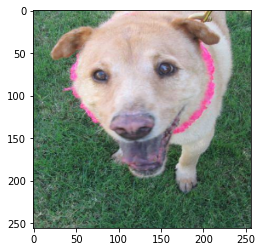

In [21]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_SVM = SVM_model.predict(input_img_features)[0] 
prediction_SVM = le.inverse_transform([prediction_SVM])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_SVM)
print("The actual label for this image is: ", test_labels[n])